# CUSTOMER CHURN PREDICTION
MUHAMMAD HANIF SUYUTHI


# DESKRIPSI

## OBJEKTIF
MEMBUAT CHURN PREDICTION MODEL DENGAN MENGGUNAKAN ANN

## PERMASALAHAN
- APA SAJA FITUR YANG MEMPENGARUHI CHURN
- BAGAIMANAKAH RANCANGAN MODEL ANN YANG OPTIMAL
- BAGAIMANAKAH HASIL DARI MODEL PREDIKSI YANG KITA BUAT


## BATASAN


# AREA KERJA

## IMPOR PUSTAKA


In [17]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split

from scipy.stats import kendalltau
from scipy.stats import chi2_contingency

from scipy.stats import skew

from feature_engine.outliers import Winsorizer
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


#model
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout, concatenate
from tensorflow.keras.layers import Input, Dense, BatchNormalization, concatenate
from tensorflow.keras.callbacks import EarlyStopping


#evaluasi

from sklearn.metrics import classification_report

#save model
import joblib

import warnings
warnings.filterwarnings("ignore")


import pickle

from sklearn.pipeline import Pipeline

## MEMUAT DATA

Data yang telah dimasukan ke dalam Drive kemudian kiat muat ke dalam df 

In [19]:
df = pd.read_csv('/content/drive/MyDrive/Hacktiv8/churn.csv')
df

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


Penjelasan tiap kolom data kita :

- user_id = ID of a customer
- age	= Age of a customer
- gender	= Gender of a customer
- region_category	= Region that a customer belongs to
- membership_category	= Category of the membership that a customer is using
- joining_date	= Date when a customer became a member
- joined_through_referral	= Whether a customer joined using any referral code or ID
- preferred_offer_types	= Type of offer that a customer prefers
- medium_of_operation	= Medium of operation that a customer uses for transactions
- internet_option	= Type of internet service a customer uses
- last_visit_time	= The last time a customer visited the website
- days_since_last_login	= Number of days since a customer last logged into the website
- avg_time_spent	= Average time spent by a customer on the website
- avg_transaction_value	= Average transaction value of a customer
- avg_frequency_login_days	= Number of times a customer has logged in to the website
- points_in_wallet	= Points awarded to a customer on each transaction
- used_special_discount	= Whether a customer uses special discounts offered
- offer_application_preference	= Whether a customer prefers offers
- past_complaint	= Whether a customer has raised any complaints
- complaint_status	= Whether the complaints raised by a customer was resolved
- feedback	= Feedback provided by a customer
- churn_risk_score = Churn score (0 : Not churn, 1 : Churn)

Setelah data dimuat kita akan melihat informasi yang ada pada kolom-kolomnya

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

Dari informasi yang ada terdapat missing  missing value didalam kolom gender, region_category, joined_through_referral, preferred_offer_types, dan medium_of_operation. 

Kita akan melakukan handling missing value pada kolom trsebut jika kolom tersebut menjadi kolom fitur

Selanjutnya kita akan melihat deskripsi statistik pada data kita

In [21]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


Dari data terlhat bahwa terdapat nilai negatif pada kolom days_since_last_login, nilai ini tidak mungkin terjadi sehingga kita akan mengubahnya menjadi 0. 

Terlihat pada kolom avg_time_spent nilai median jauh dari nilai mean 

## EDA

Selanjutnya kita akan mengeksplorasi data kita.

Sebelum itu ubah terlebih dahulu nilai negatif pada kolom days_since_last_login menjadi nilai 0 dan nilai tanggal pada kolom joining_date menjadi berapa lama (dalam hitungan hari) user menjadi pelangan.* 


*Kita asumsikan data diambil akhir tahun lalu

In [22]:
df['days_since_last_login'] = df['days_since_last_login'].mask(df['days_since_last_login'] < 0, 0)

In [23]:
df['joining_date'] = pd.to_datetime(df['joining_date'])

In [24]:
tanggal_akhir = pd.to_datetime('2022-12-31')
df['joining_days'] = tanggal_akhir - df['joining_date']

In [25]:
df['joining_days'] = df['joining_days'].dt.days

Data yang kita gunakan unutk eksplorasi adalah data df_eda yang merupakan salinan dari df

In [26]:
df_eda=df.copy()

Kita membuat kolom churn_status yang berisi arti dari kolom churn_risk_score. churn_status akan digunakan dalam grafik dan churn_risk_score akan digunakan untuk melihat nilai mean dari churn pada kolom.

In [27]:
df_eda['churn_status']=df['churn_risk_score'].apply(lambda x: 'Churn' if x == 1 else 'Not Churn')

Kita drop beberapa kolom yang tidak berkaitan dengan kolom churn

In [28]:
df_eda=df_eda.drop(['last_visit_time','user_id','joining_date'], axis=1)

Kita kelompokan terlebih dahulu kolom yang ada menjadi kolom numerik dan kategorik untuk memudahkan kita

In [29]:
cat_cols=df_eda.select_dtypes(include='object').columns.tolist()
num_cols=df_eda.select_dtypes(include=['int','float']).columns.tolist()

Kita lihat seberapa banyak user yang churn pada data kita

<Axes: xlabel='churn_status', ylabel='count'>

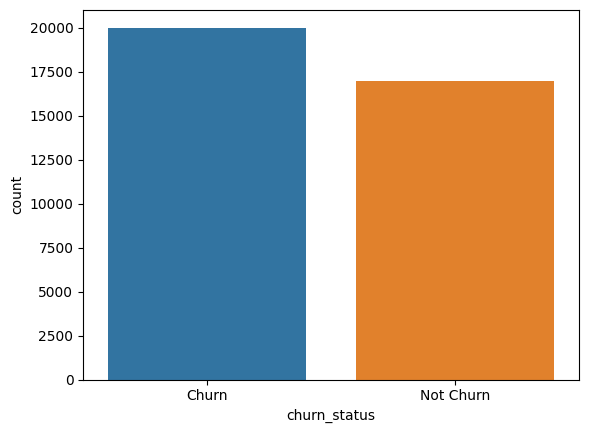

In [30]:
sns.countplot(data = df_eda ,x = 'churn_status')

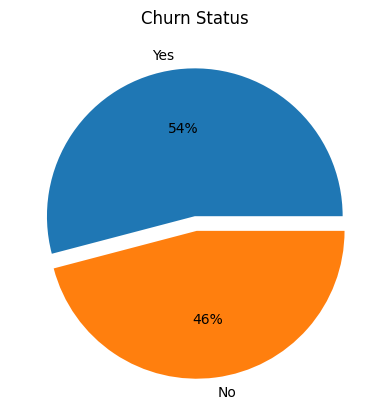

In [31]:
plt.pie(df_eda['churn_status'].value_counts(),labels = ['Yes','No'], autopct='%.0f%%', explode=[0,0.1])
plt.title('Churn Status')
plt.show()

Data kita memiliki user yang churn (54%) dibandingkan dengan yang not churn (46%)

Kita akan melihat nilai mean dari churn pada setiap kolom kategorik, jika nilai mean  churn pada nilai yang ada pada kolom tersebut berbeda jauh maka kolom tersebut memiliki korelasi yang besar terhadap churn

In [32]:
#for col in cat_cols:
#    churn_mean = df_eda.groupby(col)['churn_risk_score'].mean()
#    print(f"Rata-rata churn_risk_score berdasarkan {col}:")
#    print(churn_mean)
#    print('------------------------')

In [33]:
# buat df cats_mean
cats_mean = pd.DataFrame(columns=['Column', 'Col_Val', 'Churn Mean'])

# mencari nilai mean churn pada tiap value di kolom kategorik
for col in cat_cols:
    unique_values = df_eda[col].unique()
    
    for value in unique_values:
        churn_mean = df_eda[df_eda[col] == value]['churn_risk_score'].mean()
        cats_mean = cats_mean.append({'Column': col, 'Col_Val': value, 'Churn Mean': churn_mean}, ignore_index=True)

cats_mean

,Column,Col_Val,Churn Mean
0,gender,F,0.543385
1,gender,M,0.538528
2,gender,NaN,NaN
3,region_category,NaN,NaN
4,region_category,City,0.547003
5,region_category,Village,0.512128
6,region_category,Town,0.541988
7,membership_category,No Membership,0.970623
8,membership_category,Basic Membership,0.967517
9,membership_category,Silver Membership,0.427475


Dari tabel terlihat bahwa pada kolom membership dan feedback terdapat nilai mean churn yang besar ( > 0.6 ). Artinya kolom ini memiliki memiliki korelasi yang tinggi dangan churn.



Selanjutnya kita akan melihat grafik pada kolom kategorik

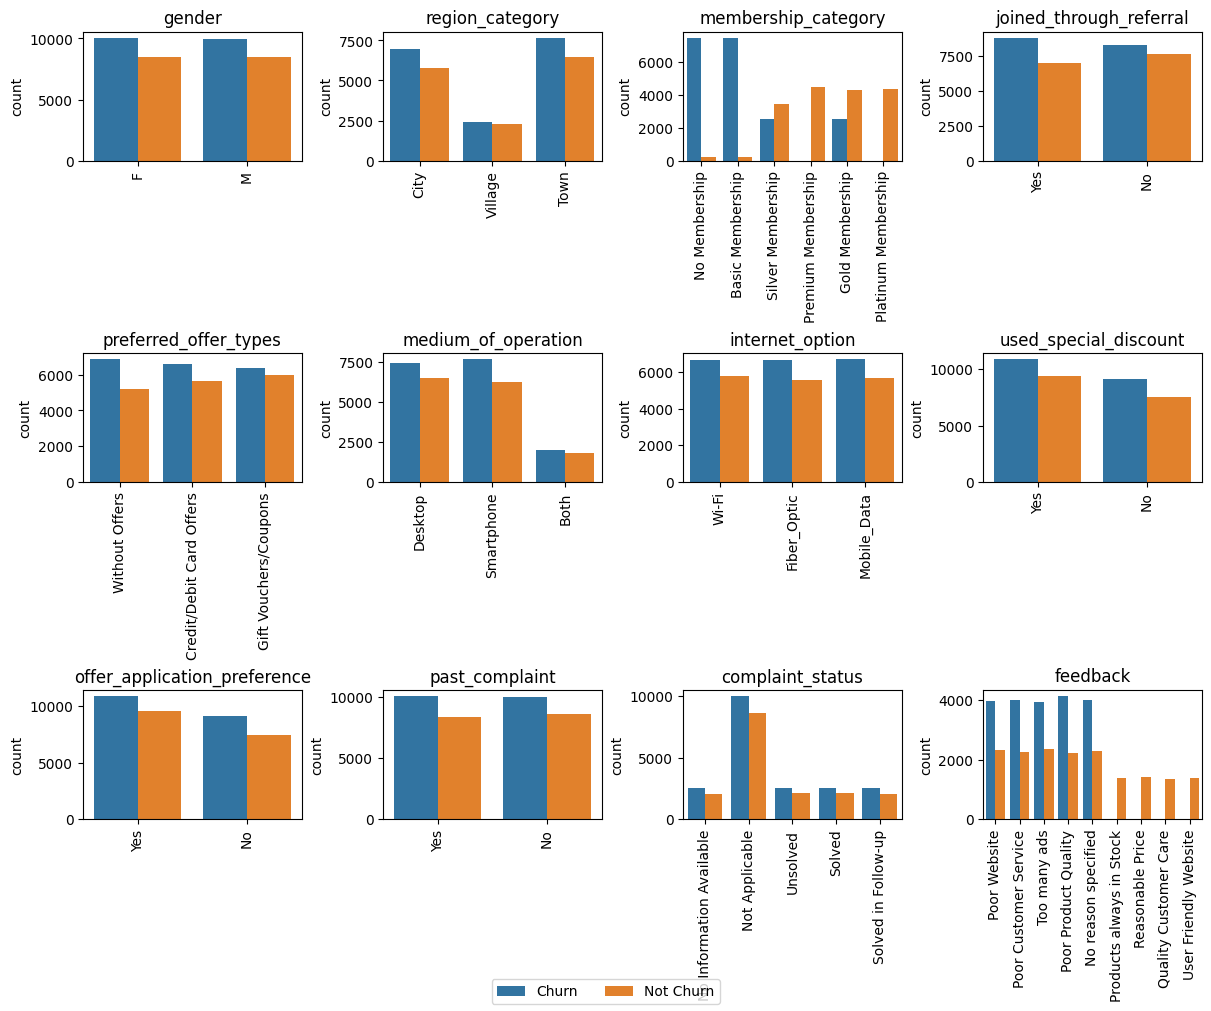

In [34]:
# grafik churn pada kolom kategorik
fig, axes = plt.subplots(3, 4, figsize=(12, 10), constrained_layout=True)

for col, ax in zip(cat_cols, axes.flat):
    sns.countplot(data = df_eda ,x=col , hue = 'churn_status', ax=ax)
    ax.tick_params(axis='x', rotation=90)
    ax.legend_.remove()
    ax.set_xlabel('')  
    ax.set_title(col)

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2)

plt.show()

Pada kolom dan grafik, terlihat kolom feedback terdapat nilai mean churn yang tinggi ada pada nilai feedback yang bernada negatif dan pada kolom membership pada golongan membership yang rendah.

Artinya selama kita belum bisa memperbaiki masalah sesuai dengan feedback user, maka bisa dipastikan kita akan mengalami penurunan jumlah user. Kita juga harus memperhatikan pelayanan pada golongan membership yang rendah atau kita bisa memberikan membership trial kepada user tersebut dan mungkin akan meningkatkan membership mereka

Selanjutya kita akan melihat grafik pada kolom numerik 

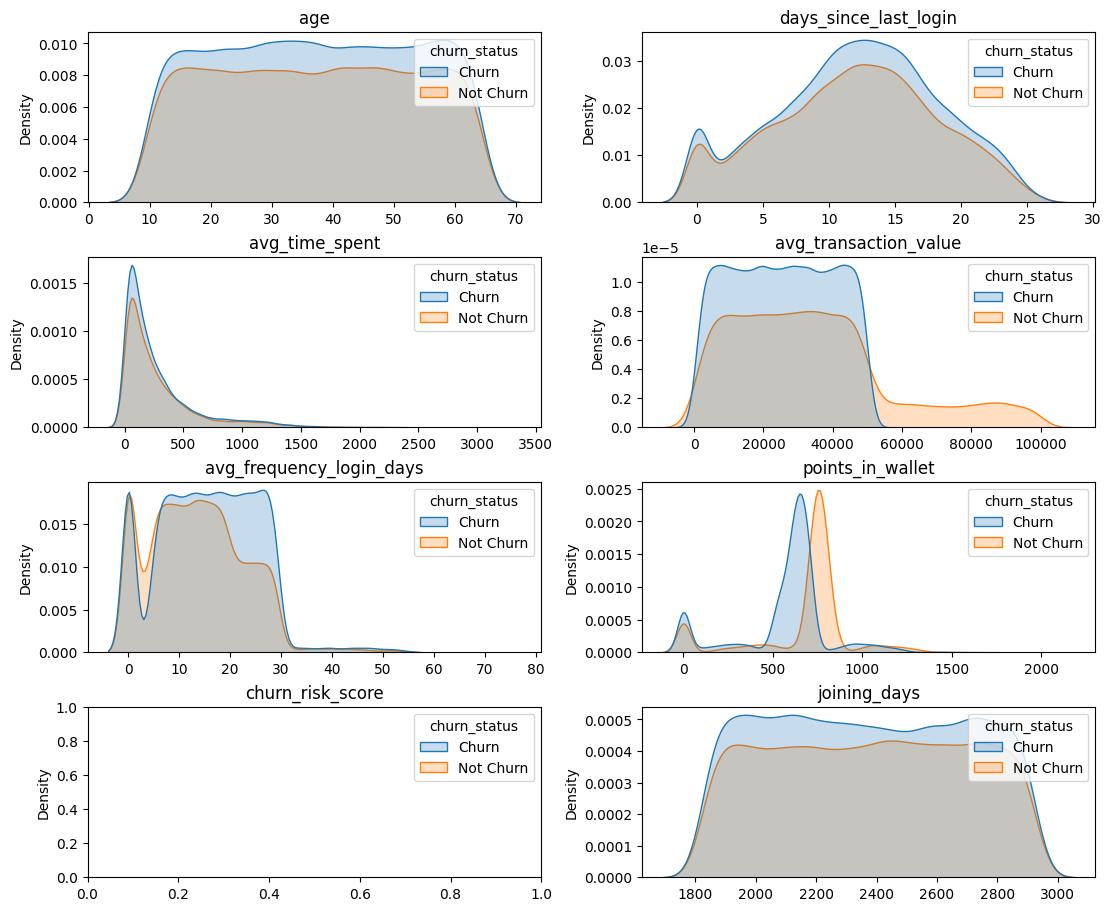

In [35]:
#grafik kolom numerik
fig, axes = plt.subplots(4, 2, figsize=(11, 9), constrained_layout=True)

for col, ax in zip(num_cols, axes.flat):
    sns.kdeplot(data = df_eda ,x=col , hue = 'churn_status', ax=ax, shade = True)
  
    ax.set_xlabel('')  
    ax.set_title(col)

Pada grafik terlihat bahwa pada kolom avg_transaction terdapat perbedaan pada churn status. Dari avg_transaction terlihat bahwa banyak user not churn yang memiliki transaksi rata-rata diatas 600000. Artinya kita bisa memfokuskan target pasar kita pada orang yang mampu melakukan transaksi rata-rata diatas 600000.

df_eda kita simpan untuk deployment

In [36]:
# simpan df eda untuk deployment
df_eda.to_csv('for_eda.csv', index=False)

## FEATURE ENGINEERING

Selanjutnya kita akan menyiapkan data yang akan kita pakai. Pada bagian ini kita akan membagi data mejadi data latih dan data tes, melakukan seleksi fitur, membuat pipeline untuk preproses data (mengisi nilai outlier, scaling, dan encoding) dam membuat input data pipeline

Sebelumnya kita drop terlebih dahulu kolom yang tidak berarti bagi model kita 

In [37]:
data=df.drop(['last_visit_time','user_id','joining_date'], axis=1)
data

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_days
0,29,F,NaN,No Membership,Yes,Without Offers,NaN,Wi-Fi,4,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1,2096
1,50,M,NaN,Basic Membership,Yes,Without Offers,Desktop,Fiber_Optic,11,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1,2101
2,26,F,City,Silver Membership,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,8,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0,2149
3,63,F,Village,No Membership,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,10,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1,2565
4,64,M,Town,Silver Membership,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,9,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0,2843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,36,M,Town,Gold Membership,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,15,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0,2858
37006,27,F,City,Gold Membership,Yes,Without Offers,Desktop,Wi-Fi,15,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0,2176
37007,20,M,NaN,Gold Membership,Yes,Without Offers,NaN,Mobile_Data,13,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0,2730
37008,38,F,City,Gold Membership,Yes,Without Offers,Desktop,Wi-Fi,0,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0,2411


### Membagi Data

Selanjutnya data kita bagi menjadai data fitur dan data target

In [38]:
X = data.drop(['churn_risk_score'], axis=1)
y = data['churn_risk_score']

Data fitur kemudian kita bagi menjadi data latih dan data tes. data latih akan kita bagi menjadai data latih dan data val

In [39]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=20)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (26739, 19)
Val Size :  (4719, 19)
Test Size :  (5552, 19)


In [40]:
X_train

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,joining_days
30811,33,M,City,Gold Membership,No,Without Offers,Desktop,Wi-Fi,14,326.43,38026.78,8.000000,728.199859,Yes,No,No,Not Applicable,Poor Customer Service,2103
32377,40,M,Town,Premium Membership,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,13,144.60,41787.37,14.000000,753.930000,Yes,No,Yes,Unsolved,No reason specified,2488
12296,42,F,Village,Platinum Membership,No,Without Offers,Smartphone,Mobile_Data,21,225.90,35794.34,14.000000,330.257449,No,Yes,No,Not Applicable,Poor Product Quality,2514
4013,48,M,Town,Basic Membership,No,Credit/Debit Card Offers,NaN,Mobile_Data,15,30.75,19112.92,0.000000,692.250000,Yes,No,No,Not Applicable,Too many ads,2763
30702,55,M,Town,Gold Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,23,122.35,8333.88,19.000000,0.000000,No,Yes,Yes,No Information Available,No reason specified,2097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844,41,F,Town,Basic Membership,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,23,41.06,8433.81,11.000000,635.460000,No,Yes,Yes,Solved in Follow-up,Poor Product Quality,2719
9288,32,F,City,Platinum Membership,No,Without Offers,Desktop,Fiber_Optic,4,177.73,2099.77,13.000000,798.700000,No,Yes,No,Not Applicable,Products always in Stock,2739
32919,26,F,Village,Basic Membership,Yes,Without Offers,Desktop,Fiber_Optic,13,0.00,33464.75,2.614214,646.860000,No,Yes,No,Not Applicable,Too many ads,2328
7756,45,M,City,Platinum Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,23,206.31,89951.03,6.000000,776.720000,No,Yes,No,Not Applicable,User Friendly Website,2397


### Feature Selection

Selanjutnya kita akan mencari fitur yang memiliki nilia korelasi yang besar terhadaap target kita

Sebelumnya kita akan membagi kolom kita menjadi kolom numerik dan kategorikal. Kolom numerik akan dilakukan .corr untuk mencari korelasi. Kolom kategorik akan mencari nilai kendall untuk kolom ordinal dan nilai chi pada kolom nominal

In [41]:
# bagi kolom numerik dan kategorik
cat_cols=X.select_dtypes(include='object').columns.tolist()
num_cols=X.select_dtypes(include=['int','float']).columns.tolist()

In [42]:
# bagi kolom ordinal dan nominal
cat_cols_ord =['membership_category']
cat_cols_nom = ['gender',
 'region_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [43]:
# bagi data numerik dan kategorik
X_train_num=X_train[num_cols]
X_train_cat=X_train[cat_cols]

In [44]:
# bagi data nominal dan ordinal
X_train_cat_nom = X_train_cat.drop(['membership_category'], axis=1)
X_train_cat_ord = X_train_cat[['membership_category']]

Untuk nilai kendall kita harus encoding terlebih dahulu kolom tersebut

In [45]:
# encoding kolom ordinal
encoder = OrdinalEncoder(categories=[["No Membership", "Basic Membership", "Silver Membership", 
                                            "Gold Membership","Premium Membership","Platinum Membership"]])

X_train_ord_encoded = encoder.fit_transform(X_train_cat_ord)

X_train_ord_encoded

array([[3.],
       [4.],
       [5.],
       ...,
       [1.],
       [5.],
       [2.]])

In [46]:
# mencari nilai kendall
df_korelasi = pd.DataFrame(columns=['Kolom Kategorikal', 'Korelasi Kendall', 'Nilai p'])
corr, p_value = kendalltau(X_train_ord_encoded, y_train)
df_korelasi = df_korelasi.append({'Kolom Kategorikal': 'membership_category', 'Korelasi Kendall': corr, 'Nilai p': p_value}, ignore_index=True)

print(df_korelasi)

     Kolom Kategorikal  Korelasi Kendall  Nilai p
0  membership_category         -0.667832      0.0


Dari nilai kendall terlihat bahwa kolom membership mempunyai pengaruh negatif yang besar kepada nilai churn. 

Selanjutnya kita akan mencari niali chi pada kolom nominal. Kita tidak perlu melakukan encoding terlebih dahulu untuk menemukan nilai chi.

In [47]:
df_korelasi = pd.DataFrame(columns=['Kolom Kategorik', 'Chi-Square', 'P-value'])

#Mencari nilai chi
for kolom in X_train_cat_nom.columns:
    cross_tab = pd.crosstab(X_train_cat_nom[kolom], y_train)
    chi2, p_value, _, _ = chi2_contingency(cross_tab)
    df_korelasi = df_korelasi.append({'Kolom Kategorik': kolom, 'Chi-Square': chi2, 'P-value': p_value}, ignore_index=True)

print(df_korelasi)

                 Kolom Kategorik   Chi-Square       P-value
0                         gender     0.003095  9.556311e-01
1                region_category    10.803122  4.509536e-03
2        joined_through_referral    32.337716  1.295737e-08
3          preferred_offer_types    47.275193  5.424031e-11
4            medium_of_operation    10.160007  6.219887e-03
5                internet_option     1.472226  4.789722e-01
6          used_special_discount     2.783318  9.525065e-02
7   offer_application_preference    11.161353  8.351898e-04
8                 past_complaint     3.236359  7.202055e-02
9               complaint_status     4.969186  2.904738e-01
10                      feedback  5612.041145  0.000000e+00


Dari tabel telihat bahwa kolom feedback memiliki nilai chi yang sangat besar terhadap nilai churn

Selanjutnya kita cari korelasi pada kolom numerik

In [48]:
df_korelasi = pd.DataFrame(columns=['Kolom Num', 'pearson', 'spearman'])

# korelasi kolom numerik
for kolom in X_train_num.columns:
    korelasi_pearson = X_train_num[kolom].corr(df['churn_risk_score'])
    korelasi_spearman = X_train_num[kolom].corr(df['churn_risk_score'], method='spearman')
    df_korelasi = df_korelasi.append({'Kolom Num': kolom, 'pearson': korelasi_pearson, 'spearman': korelasi_spearman}, ignore_index=True)

print(df_korelasi)

                  Kolom Num   pearson  spearman
0                       age  0.006356  0.006284
1     days_since_last_login  0.014551  0.014708
2            avg_time_spent -0.014117 -0.019230
3     avg_transaction_value -0.217345 -0.148555
4  avg_frequency_login_days  0.113939  0.118635
5          points_in_wallet -0.205909 -0.465033
6              joining_days -0.007533 -0.007480


Dari tabel terlihat bahwa nilai korelasi yang besar terdapat pada kolom avg_transaction_value,avg_frequency_login_days, dan points_in_wallet

Dari hasil korelasi tersebut kita bisa mengambil kolom 'membership_category','feedback','avg_transaction_value','avg_frequency_login_days', dan 'points_in_wallet' sebagai fitue kita karena memiliki korelasi yang besar pada nilai churn

In [49]:
# kolom fitur
kolom_fitur=['membership_category','feedback','avg_transaction_value','avg_frequency_login_days','points_in_wallet']

In [50]:
X_train = X_train[kolom_fitur]
X_test = X_test[kolom_fitur]

In [51]:
# kolom numerik dari fitur
num_cols=X_train.select_dtypes(include=['int','float']).columns.tolist()

In [52]:
# kolom kategorik dari fitur
cat_cols_nom=['feedback']
cat_cols_ord=['membership_category']

### Pipeline

Selanjutnya kita akan membuat pipeline yang berisi pre proses kepada data kita. Pada pipeline ini kita akan memakai winsorizer untuk outlier, scaling dengan standarscaler, encoding ordinal, dan encoding OneHot. Kita memakai winsorizer untuk menginput nilai outline karena kita tidak ingin kehilangan data yang ada

In [53]:
# numerik pipeline - winsorizer dan standarscaler
num_pipeline = Pipeline([
    ('winsorizer', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
    ('scaler', StandardScaler())
])

# ordinal pipeline - ordinalencoder
cat_ord_pipeline = Pipeline([
    ('encoder', OrdinalEncoder(categories=[["No Membership", "Basic Membership", "Silver Membership", 
                                            "Gold Membership","Premium Membership","Platinum Membership"]]))
])

# nominal pipeline - OHencoder
cat_nom_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

# Column Transformer
pipeline = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat_ord', cat_ord_pipeline, cat_cols_ord),
        ('cat_nom', cat_nom_pipeline, cat_cols_nom)
    ]
)


In [54]:
# terapkan pipeline
X_train_scaled = pipeline.fit_transform(X_train)
X_val_scaled = pipeline.transform(X_val)
X_test_scaled = pipeline.transform(X_test)
X_train.shape

(26739, 5)

### Input Data Pipeline

Selanjutnya kita akan melakukan Input data Pipeline. Pada proses ini data akan dokelompokan dan diulang. proses ini bertujuan untuk mempercepat proses modeling kita nantinya 

In [55]:
# Input Data Pipeline
train_pipe = tf.data.Dataset.from_tensor_slices((X_train_scaled,y_train)).batch(32).repeat(2).prefetch(tf.data.AUTOTUNE)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test_scaled,y_test)).batch(16)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val_scaled,y_val)).batch(16)

## MODEL DEFINITION

Selanjutnya kita akan melakukan pemodelan dengan algoritna ANN. Pada model kita akan mencari model terbaik dari Sequential, finctional, dan improve dari keduanya

Sebelum itu kita akan membuat callback yang berfungsi untuk memberhentikan proses pelatihan ketika model sudah memilliki performa yang bagus.

In [90]:
# membuat callback 
callback_es = EarlyStopping(monitor ='val_loss', patience = 3, restore_best_weights=True)

Pada Model ini kita akan menggunakan algoritma ANN. Pada algoritma ini akan dibuat hidden layer yang memiliki neuron-neuron. Neuron-neuron tersebut akan saling terhubung dengan neuron pada layer lain. Pada layer terdapat fungsi aktivasi yang membuat nilai output pada layer akan berubah.

Kita akan hanya akan menggunakan aktivasi relu pada hidden layer dan sigmoid pada output layer. Kita memakai relu karena efisien dan cepat saat digunakan. Kita menggunakan sigmoid karena output adalah biner (2 nilai).



Pada proses pelatihan kita memilih optimizer 'adam', loss function 'binary_crossentropy', dan metrik evaluasi 'accuracy'.

Optimizer adalah algoritma optimasi yang digunakan untuk memperbarui bobot dan bias berdasarkan nilai kesalahan yang dihitung.

Loss function digunakan untuk mengukur sejauh mana prediksi yang dihasilkan dengan nilai yang sebenarnya. binary_crossentropy mengukur kesalahan antara prediksi model dan nilai target menggunakan konsep entropi silang (cross-entropy). Tujuan utama adalah untuk mengurangi kesalahan prediksi biner model.

Pada proses training, kita menentukan epoch yang digunakan adalah 30. epoch adalah siklus pelatihan yang dilakukan oleh model. pada setiap siklus model akan menyesuaikan bobot dan bias dengan fungsi optimasi.

Suatu model yang bagus dapat dilihat dari grafik loss dan val_loss. model dikatakan bagus jika kedua nilai tersebut berdekatan dan saling turun.

Perbedaan yang mendasara antara algoritma biasa dan algoritma improvement yang kaan kita lakukan hanya terletak pada penambahan jumlah layer

## SEQUENTIAL API

### Model Definition

Pada sequential model nilai input hidden layer berasal dari layer sebelumnya secara berurutan

In [91]:
seed = 8
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [92]:
model_seq = Sequential()
model_seq.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_seq.add(Dense(16, activation='relu'))
model_seq.add(Dense(1, activation='sigmoid'))


model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


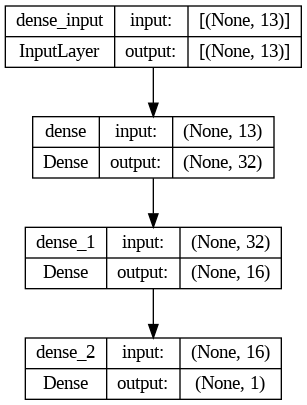

In [93]:
tf.keras.utils.plot_model(model_seq, show_shapes=True)

### Model Training

In [94]:
model_seq.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_seq=model_seq.fit(train_pipe, epochs=30, validation_data=val_pipe, callbacks=[callback_es])

Epoch 1/30
1672/1672 [==============================] - 4s 2ms/step - loss: 0.2857 - accuracy: 0.8615 - val_loss: 0.2473 - val_accuracy: 0.8981
Epoch 2/30
1672/1672 [==============================] - 4s 3ms/step - loss: 0.2141 - accuracy: 0.9156 - val_loss: 0.2156 - val_accuracy: 0.9102
Epoch 3/30
1672/1672 [==============================] - 3s 2ms/step - loss: 0.1930 - accuracy: 0.9247 - val_loss: 0.1977 - val_accuracy: 0.9174
Epoch 4/30
1672/1672 [==============================] - 3s 2ms/step - loss: 0.1808 - accuracy: 0.9277 - val_loss: 0.1883 - val_accuracy: 0.9199
Epoch 5/30
1672/1672 [==============================] - 4s 2ms/step - loss: 0.1737 - accuracy: 0.9280 - val_loss: 0.1829 - val_accuracy: 0.9235
Epoch 6/30
1672/1672 [==============================] - 4s 2ms/step - loss: 0.1695 - accuracy: 0.9277 - val_loss: 0.1788 - val_accuracy: 0.9258
Epoch 7/30
1672/1672 [==============================] - 3s 2ms/step - loss: 0.1669 - accuracy: 0.9278 - val_loss: 0.1759 - val_accuracy:

### Model Evaluation

In [95]:
# Create DataFrame
history_seq= pd.DataFrame(history_seq.history)
history_seq

,loss,accuracy,val_loss,val_accuracy
0,0.285679,0.861513,0.247311,0.898072
1,0.214079,0.915629,0.215649,0.910150
2,0.193016,0.924661,0.197710,0.917355
3,0.180839,0.927671,0.188346,0.919898
4,0.173690,0.927952,0.182934,0.923501
5,0.169463,0.927690,0.178804,0.925832
6,0.166852,0.927802,0.175850,0.929010
7,0.165053,0.928550,0.174439,0.929646
8,0.163908,0.928681,0.174142,0.929646
9,0.162999,0.928924,0.172267,0.930070


<Axes: >

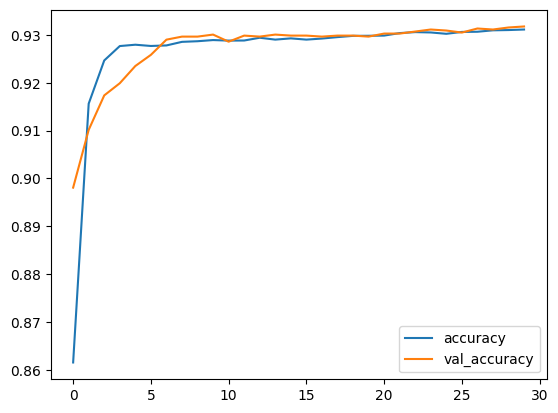

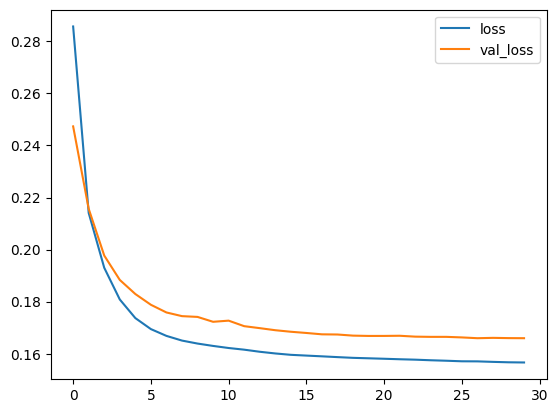

In [96]:
history_seq[['accuracy', 'val_accuracy']].plot()
history_seq[['loss', 'val_loss']].plot()

In [97]:
y_pred_seq = model_seq.predict(test_pipe)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

347/347 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2524
           1       0.93      0.94      0.94      3028

    accuracy                           0.93      5552
   macro avg       0.93      0.93      0.93      5552
weighted avg       0.93      0.93      0.93      5552



## FUNCTIONAL - API

### Model Definition

In [98]:
seed = 8
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [99]:
input_layer = Input(shape=(X_train_scaled.shape[1],))
hidden_layer = Dense(16, activation='relu')(input_layer)
concat_layer = concatenate([input_layer, hidden_layer])
output_layer = Dense(1, activation='sigmoid')(concat_layer)


model_fun = Model(inputs=input_layer, outputs=output_layer)

model_fun.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           224         ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 29)           0           ['input_1[0][0]',                
                                                                  'dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 1)            30          ['concatenate[0][0]']        

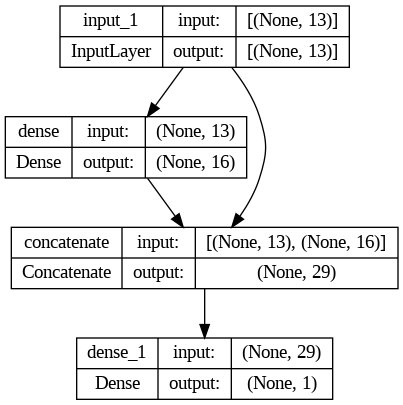

In [100]:
# Plot Layers

tf.keras.utils.plot_model(model_fun, show_shapes=True)

### Model Training

In [101]:
model_fun.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history_fun=model_fun.fit(train_pipe, epochs=30, validation_data=val_pipe, callbacks=[callback_es])

Epoch 1/30
1672/1672 [==============================] - 4s 2ms/step - loss: 0.3728 - accuracy: 0.8390 - val_loss: 0.3190 - val_accuracy: 0.8529
Epoch 2/30
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2981 - accuracy: 0.8522 - val_loss: 0.3025 - val_accuracy: 0.8489
Epoch 3/30
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2897 - accuracy: 0.8487 - val_loss: 0.2977 - val_accuracy: 0.8481
Epoch 4/30
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2864 - accuracy: 0.8486 - val_loss: 0.2949 - val_accuracy: 0.8472
Epoch 5/30
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2843 - accuracy: 0.8490 - val_loss: 0.2927 - val_accuracy: 0.8470
Epoch 6/30
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2824 - accuracy: 0.8490 - val_loss: 0.2907 - val_accuracy: 0.8468
Epoch 7/30
1672/1672 [==============================] - 4s 2ms/step - loss: 0.2807 - accuracy: 0.8490 - val_loss: 0.2887 - val_accuracy:

### Model Evaluation

In [102]:
# Create DataFrame
history_fun= pd.DataFrame(history_fun.history)
history_fun

,loss,accuracy,val_loss,val_accuracy
0,0.372778,0.838962,0.319014,0.852935
1,0.298131,0.852201,0.302484,0.848909
2,0.289667,0.848667,0.297705,0.848061
3,0.286416,0.848611,0.294917,0.847213
4,0.284279,0.848985,0.292739,0.847001
5,0.282440,0.848966,0.290745,0.846790
6,0.280677,0.849041,0.288720,0.847001
7,0.278821,0.848835,0.286511,0.846790
8,0.276843,0.848685,0.284229,0.846366
9,0.274819,0.848498,0.281966,0.846790


<Axes: >

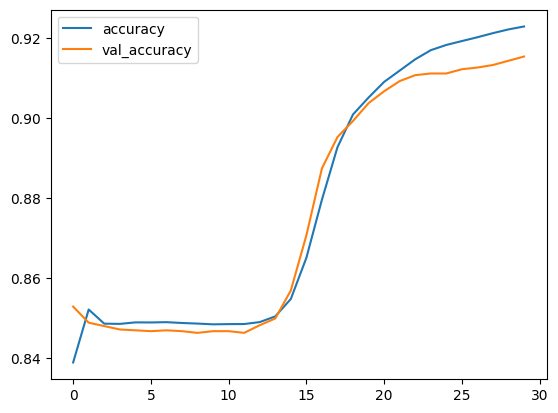

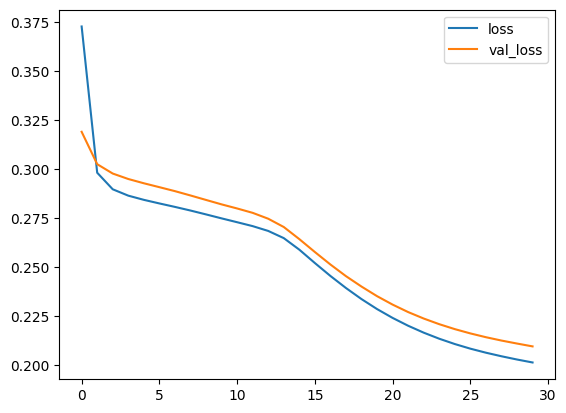

In [103]:
history_fun[['accuracy', 'val_accuracy']].plot()
history_fun[['loss', 'val_loss']].plot()

In [104]:
y_pred_seq = model_fun.predict(test_pipe)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

347/347 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2524
           1       0.92      0.92      0.92      3028

    accuracy                           0.91      5552
   macro avg       0.91      0.91      0.91      5552
weighted avg       0.91      0.91      0.91      5552



## SEQUENTIAL IMPROVMENT

### Model Definition

In [105]:
seed = 8
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [106]:
model_seq_imp = Sequential()
model_seq_imp.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_seq_imp.add(Dense(16, activation='relu'))
model_seq_imp.add(Dense(8, activation='relu'))
model_seq_imp.add(Dense(1, activation='sigmoid'))

model_seq_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


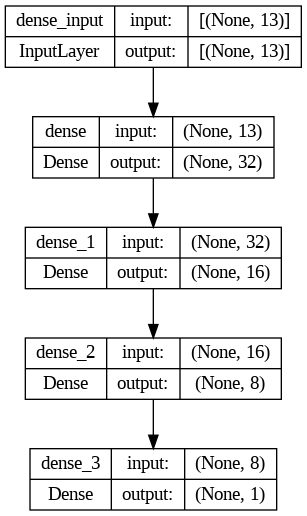

In [107]:
# Plot Layers

tf.keras.utils.plot_model(model_seq_imp, show_shapes=True)

### Model Training

In [108]:
model_seq_imp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_seq_imp=model_seq_imp.fit(train_pipe, epochs=30, validation_data=val_pipe, callbacks=[callback_es])

Epoch 1/30
1672/1672 [==============================] - 6s 3ms/step - loss: 0.2714 - accuracy: 0.8742 - val_loss: 0.2171 - val_accuracy: 0.9133
Epoch 2/30
1672/1672 [==============================] - 4s 2ms/step - loss: 0.1854 - accuracy: 0.9268 - val_loss: 0.1910 - val_accuracy: 0.9191
Epoch 3/30
1672/1672 [==============================] - 4s 2ms/step - loss: 0.1756 - accuracy: 0.9278 - val_loss: 0.1823 - val_accuracy: 0.9227
Epoch 4/30
1672/1672 [==============================] - 5s 3ms/step - loss: 0.1717 - accuracy: 0.9279 - val_loss: 0.1786 - val_accuracy: 0.9233
Epoch 5/30
1672/1672 [==============================] - 3s 2ms/step - loss: 0.1690 - accuracy: 0.9279 - val_loss: 0.1753 - val_accuracy: 0.9254
Epoch 6/30
1672/1672 [==============================] - 4s 2ms/step - loss: 0.1667 - accuracy: 0.9280 - val_loss: 0.1732 - val_accuracy: 0.9267
Epoch 7/30
1672/1672 [==============================] - 4s 3ms/step - loss: 0.1646 - accuracy: 0.9277 - val_loss: 0.1717 - val_accuracy:

### Model Evaluation

In [109]:
# Create DataFrame
history_seq_imp= pd.DataFrame(history_seq_imp.history)
history_seq_imp

,loss,accuracy,val_loss,val_accuracy
0,0.271435,0.874191,0.217133,0.913329
1,0.185373,0.926774,0.190982,0.919051
2,0.175565,0.927802,0.182296,0.922653
3,0.171679,0.927858,0.178560,0.923289
4,0.168983,0.927914,0.175309,0.925408
5,0.166674,0.928026,0.173166,0.926679
6,0.164633,0.927709,0.171687,0.926679
7,0.162702,0.928195,0.168359,0.927103
8,0.160635,0.929055,0.166328,0.928587
9,0.158918,0.929429,0.165073,0.927951


<Axes: >

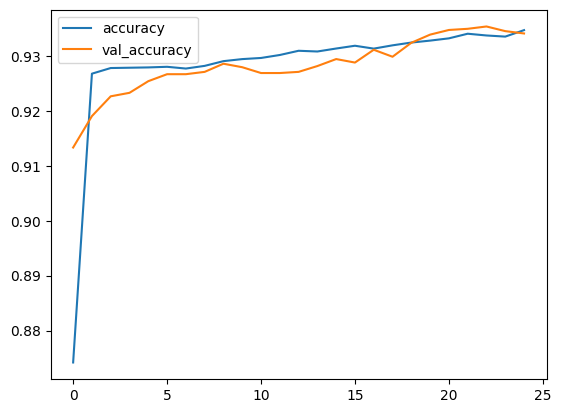

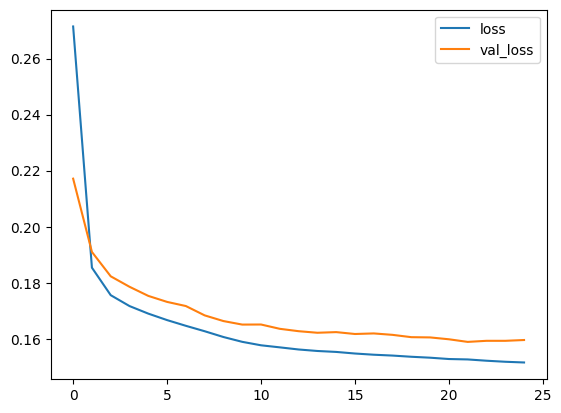

In [110]:
history_seq_imp[['accuracy', 'val_accuracy']].plot()
history_seq_imp[['loss', 'val_loss']].plot()

In [111]:
y_pred_seq = model_seq_imp.predict(test_pipe)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

347/347 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2524
           1       0.93      0.95      0.94      3028

    accuracy                           0.93      5552
   macro avg       0.93      0.93      0.93      5552
weighted avg       0.93      0.93      0.93      5552



## FUNCTIONAL IMPROVEMENT

### Model Definition

In [112]:
seed = 8
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [113]:
input_layer = Input(shape=(X_train_scaled.shape[1],))
hidden_layer = Dense(16, activation='relu')(input_layer)
hidden_layer_2 = Dense(8, activation='relu')(hidden_layer)
concat_layer = concatenate([input_layer, hidden_layer])
output_layer = Dense(1, activation='sigmoid')(concat_layer)


model_fun_imp = Model(inputs=input_layer, outputs=output_layer)

model_fun_imp.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 16)           224         ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 29)           0           ['input_1[0][0]',                
                                                                  'dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 1)            30          ['concatenate[0][0]']        

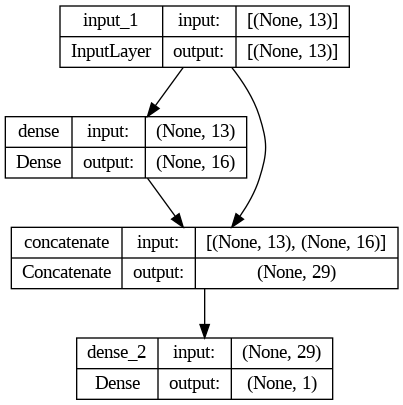

In [114]:
# Plot Layers

tf.keras.utils.plot_model(model_fun_imp, show_shapes=True)

### Model Training

In [115]:
model_fun_imp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_fun_imp=model_fun_imp.fit(train_pipe, epochs=30, validation_data=val_pipe, callbacks=[callback_es])

Epoch 1/30
1672/1672 [==============================] - 4s 2ms/step - loss: 0.3926 - accuracy: 0.7996 - val_loss: 0.2921 - val_accuracy: 0.8457
Epoch 2/30
1672/1672 [==============================] - 4s 2ms/step - loss: 0.2760 - accuracy: 0.8487 - val_loss: 0.2810 - val_accuracy: 0.8466
Epoch 3/30
1672/1672 [==============================] - 4s 2ms/step - loss: 0.2636 - accuracy: 0.8523 - val_loss: 0.2661 - val_accuracy: 0.8625
Epoch 4/30
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2470 - accuracy: 0.8741 - val_loss: 0.2503 - val_accuracy: 0.8881
Epoch 5/30
1672/1672 [==============================] - 4s 2ms/step - loss: 0.2327 - accuracy: 0.8973 - val_loss: 0.2375 - val_accuracy: 0.9008
Epoch 6/30
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2221 - accuracy: 0.9077 - val_loss: 0.2280 - val_accuracy: 0.9078
Epoch 7/30
1672/1672 [==============================] - 3s 2ms/step - loss: 0.2144 - accuracy: 0.9131 - val_loss: 0.2211 - val_accuracy:

### Model Evaluation

In [116]:
# Create DataFrame
history_fun_imp= pd.DataFrame(history_fun_imp.history)
history_fun_imp

,loss,accuracy,val_loss,val_accuracy
0,0.392569,0.799637,0.292057,0.845730
1,0.275969,0.848667,0.281045,0.846578
2,0.263616,0.852294,0.266111,0.862471
3,0.246950,0.874079,0.250333,0.888112
4,0.232740,0.897304,0.237530,0.900826
5,0.222059,0.907663,0.227965,0.907819
6,0.214367,0.913123,0.221072,0.912905
7,0.208849,0.916639,0.215887,0.913541
8,0.204707,0.919182,0.211741,0.914601
9,0.201193,0.920622,0.208563,0.913965


<Axes: >

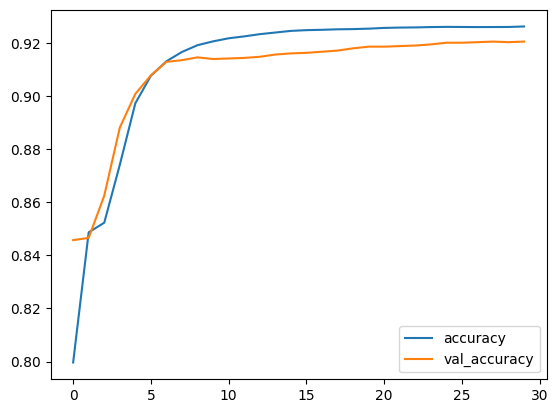

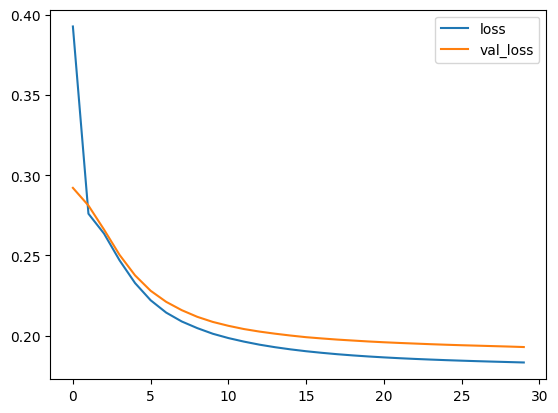

In [117]:
history_fun_imp[['accuracy', 'val_accuracy']].plot()
history_fun_imp[['loss', 'val_loss']].plot()

In [118]:
y_pred_seq = model_fun_imp.predict(test_pipe)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

347/347 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2524
           1       0.92      0.93      0.93      3028

    accuracy                           0.92      5552
   macro avg       0.92      0.92      0.92      5552
weighted avg       0.92      0.92      0.92      5552



## MODEL SAVING

In [119]:
# Save Pipeline
with open('pipeline.pkl', 'wb') as file_1:
  pickle.dump(pipeline, file_1)

In [120]:
# Model Summary

model_seq_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [121]:
# Freeze Model

model_seq_imp.trainable = False

In [122]:
# Save ANN Model

model_seq_imp.save('churn_model.h5')

# KESIMPULAN

- Berdasarkan EDA terlihat bahwa:
  - User yang churn (54%) lebih banyak daripada yang not churn (46%)
  - Semua yang bernilai churn memiliki feedback yang buruk. Jika kita bisa meneliti lebih jauh kapan mereka bergabung dan kapan mereka churn kita bisa tau apakah masalah ini memang sudah dari lama atau baru-baru saja  
  - Kebanyakan yang churn adalah membership yang memiliki membership yang rendah (no membership dan basic membership). Mereka bisa saja merasa tidak nyaman atas layanan yang kita berikan pada kategori membership tersebut. Kita bisa mensiasati dengan memberikan membership trial agar mereka bisa merasakan dan menaikan membership mereka ke kategori yang lebih tinggi

- Algoritma yang kita pilih untuk model adalah ANN Sequential yang telah di improve. Algoritma tersebut memiliki 3 layer dengan nilai neuron berurutan 32,16, dan 8. Algoritma tersebut menghasilkan nilai akurasi yang sama dengan sequential tanpa improvment (0,93) akan tetapi algoritma tersebut memiliki nilai recall pada target 1 yang tinggi (0.95) dibandingkan sequential tanpa improvement (0.94)